
# Project: Brazil Medical Appointment Data Analysis - Fenny Tsai

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
In this project, we will be analyzing what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment.

The original dataset can be downloaded from kaggle:  https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv.

There are 14 columns in the dataset and the most important variable is the No-show column.

Below are the descriptions of each columns:

- 01 PatientID: patient's identical ID number
- 02 AppointmentID: patient's identical appointment ID number 
- 03 Gender: Male or Female
- 04 ScheduledDay: the day patient set up their appointment
- 05 AppointmentDay: patient's actual appointment day
- 06 Age: patient's age
- 07 Neighborhood: the location of the hospital 
- 08 Scholarship: indicates whether the patient is enrolled in Brasilian welfare program Bolsa Família
- 09 Hipertension: indicates whether the patient has hypertension, 1 is True, 0 is False
- 10 Diabetes: indicates whether the patient has Diabetes, 1 is True, 0 is False
- 11 Alcoholism: indicates whether the patient is an alcoholic, 1 is True, 0 is False
- 12 Handcap: indicates whether the patient is handicapped, 1 is True, 0 is False
- 13 SMS_received: indicates whether the patient received SMS notification for their appointment, 1 is True, 0 is False
- 14 No show: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up

### Question(s) for Analysis

1. What are the amount of patients for female and male?
2. What is the porprotion of appointment between show up and no shows?
3. What are the amount of patients show up or no show within the gender?
4. What is the age distribution between show up and no shows?
5. Whether patients enrolled and non-enrolled in Brasilian welfare program show up or no show for the appoimtment?
6. Whether patients received SMS show up or no show for the appoimtment?
7. How many patients attend or not attend for the appointment in each hospital?


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 2.9MB/s eta 0:00:01   24% |███████▊                        | 2.5MB 27.6MB/s eta 0:00:01    50% |████████████████▏               | 5.3MB 28.8MB/s eta 0:00:01    63% |████████████████████▎           | 6.6MB 28.0MB/s eta 0:00:01    89% |████████████████████████████▋   | 9.3MB 27.5MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.6MB/s eta 0:00:01  8% |██▋                             | 1.1MB 25.8MB/s eta 0:00:01    36% |███████████▌                    | 4.8MB 26.0MB/s eta 0:00:01    62% |████████████████████            | 8.4MB 26.4MB/s eta 0:00:01    80% |█████████████████████████▊      | 10.8MB 21.2MB/s eta 0:00:01    88% |████████████████████████████▌   | 11.9MB 23.0MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: p

In [4]:
!ls

Database_Ncis_and_Census_data  Database_TMDb_movie_data
Database_No_show_appointments  Investigate_a_Dataset.ipynb
Database_Soccer		       tmdb-movies.csv


<a id='wrangling'></a>
## Data Wrangling

#### Load the dataset

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Total rows and columns in the dataset

In [3]:
df.shape

(110527, 14)

#### Data information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Decription of each column

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning

> Several changes need to be make:
1. Rename column names
2. Transfer 'ScheduledDay' & 'AppointmentDay' datatype from string to date
3. Transfer column "No_Show" to datatype int (0,1)
4. Minimum Age shouldn't be negative number
5. Check for null data 
6. Check for duplicate data

#### Rename several columns
- Hipertension -> Hypertension
- Handcap -> Handicapped
- No-show -> No_Show
- SMS_received -> SMS_Received

In [4]:
df.rename({'Hipertension':'Hypertension','Handcap':'Handicapped','No-show':'No_Show','SMS_received':'SMS_Received' }, axis='columns', inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_Received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Change "ScheduledDay" & "AppointmentDay" datatype from string to date

In [5]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']).dt.date
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicapped       110527 non-null int64
SMS_Received      110527 non-null int64
No_Show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


#### Change data in "No_Show" from  to 1 and 0
1 means patient not showing for the appointment; 0 means patient shows up for the appointment

In [6]:
df.No_Show[df['No_Show']=='Yes'] = '1'
df.No_Show[df['No_Show']=='No'] = '0'

Double check the data has been successfully transferred 

In [9]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_Received,No_Show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


#### Change "No_Show" datatype from string to int

In [7]:
df['No_Show'] = df['No_Show'].astype(int)

In [11]:
#double check the data type is successfully transferred 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicapped       110527 non-null int64
SMS_Received      110527 non-null int64
No_Show           110527 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(2)
memory usage: 11.8+ MB


Access data where the 'Age' is  <  0

In [8]:
df[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_Received,No_Show
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,0


#### Drop the selected data row where age is < 0

In [9]:
df.drop(df.index[99832], inplace=True)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_Received,No_Show
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


Check if there is any null data in the dataset

In [10]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicapped       0
SMS_Received      0
No_Show           0
dtype: int64

Check if there is any duplicated data in the dataset

In [11]:
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1: What is the amount of patients for female and male?

In [11]:
def myPlot_Uni(df,xVar):
    plt.figure(figsize=[5,5])
    sns.countplot(x=xVar, data=df)
    plt.title(f"Distribution by {xVar}")
    plt.xlabel(xVar)
    plt.ylabel("Numbers of Patient")

In [16]:
df.Gender.value_counts()

F    71839
M    38686
Name: Gender, dtype: int64

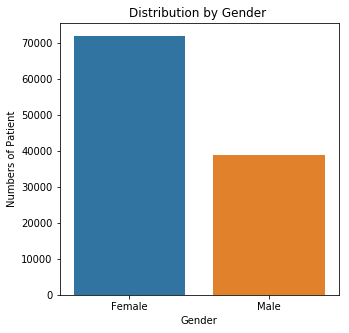

In [57]:
myPlot_Uni(df, 'Gender')
plt.xticks([0,1],['Female', 'Male']);

From the gender graph, it can be seen that the numbers of females patients are greater than of males patients.

### Research Question 2: What is the  age distribution between show up and no shows?

In [18]:
df.No_Show.value_counts()

0    88207
1    22319
Name: No_Show, dtype: int64

In [19]:
NoShow = df.No_Show == 1
YesShow = df.No_Show == 0

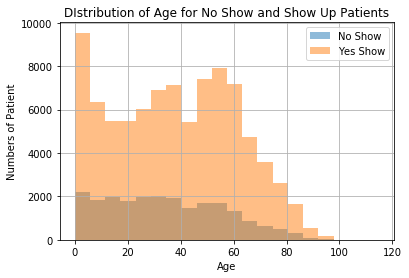

In [20]:
df.Age[NoShow].hist(alpha=0.5, bins=20, label='No Show')
df.Age[YesShow].hist(alpha=0.5, bins=20, label='Yes Show')
plt.title("DIstribution of Age for No Show and Show Up Patients")
plt.xlabel("Age")
plt.ylabel("Numbers of Patient");
plt.legend();

From the age graph, it can be seen that the most distribution of age is fron 0-5, 50-55, 45,50 yers old.

### Research Question 3: What is the porprotion of appointment between show up and no shows?

In [21]:
No_Show_Proportion = df.No_Show.value_counts()
No_Show_Proportion

0    88207
1    22319
Name: No_Show, dtype: int64

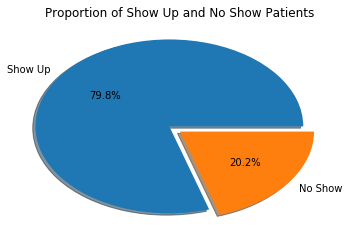

In [22]:
explode = (0.1, 0)
label = ['Show Up', 'No Show']
plt.title("Proportion of Show Up and No Show Patients")
plt.pie(No_Show_Proportion, labels=label, autopct='%1.1f%%', explode = explode, shadow=True);

The proportion of patients that show up for the appointment is 79.8% and no show for the  appointment is 20.2%.

Total attended appointments is far greater than non attended appoitment.

### Research Question 4: What are the amount of patients show up or no show within the gender?

In [23]:
df.groupby('Gender').No_Show.value_counts()

Gender  No_Show
F       0          57245
        1          14594
M       0          30961
        1           7725
Name: No_Show, dtype: int64

In [91]:
def myPlot_Bivar(df,xVar,yVar):
    #yVar = re.sub('[^A-Za-z]+', ' ',xVar)
    plt.figure(figsize=[5,5])
    sns.countplot(x=xVar, hue=yVar, data=df)
    plt.title(f"Distribution of {yVar} by {xVar}")
    plt.xlabel(xVar)
    plt.ylabel("Numbers of Patient")

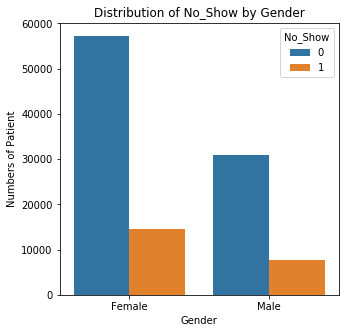

In [92]:
myPlot_Bivar(df,'Gender', 'No_Show')
plt.xticks([0,1],['Female','Male']);

* 0 means show up ,1 means no show

The number of female who attended the appointment is greater than male.

The number of female who didn't attend the appointment greater than male.

In [78]:
def Plot_Pie_Bivar(xVar, gender):
    explode = (0.1, 0)
    plt.title(f"Proportion of Show Up and No Show Patients within {gender}")
    plt.pie(xVar, labels=label, autopct='%1.1f%%', explode = explode, shadow=True);

In [79]:
Female_Proportion = df[df['Gender']=='F'].No_Show.value_counts()
Male_Proportion = df[df['Gender']=='M'].No_Show.value_counts()

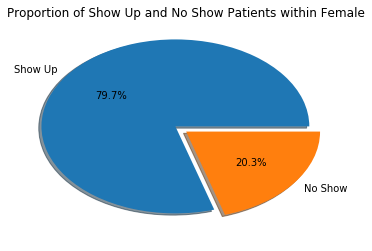

In [80]:
label = ['Show Up', 'No Show']
Plot_Pie_Bivar(Female_Proportion, 'Female');

The proportion of "female patients" that show-up for the appointment is 79.7% and no show for the appointment is 20.3%.

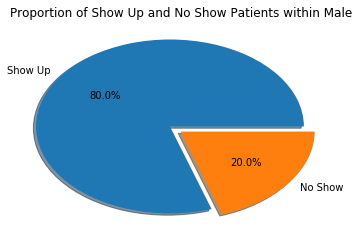

In [81]:
label = ['Show Up', 'No Show']
Plot_Pie_Bivar(Male_Proportion, 'Male');

The proportion of "male patients" that show up for the appointment is 80.0% and no show for the appointment is 20.0%.

To conclude, male patients has slightly higher attendant rate than female.

### Research Question 5: Whether patients enrolled and non-enrolled in Brazilian welfare program show up or no show for the appoimtment?

In [28]:
df.groupby('Scholarship').No_Show.value_counts()

Scholarship  No_Show
0            0          79924
             1          19741
1            0           8283
             1           2578
Name: No_Show, dtype: int64

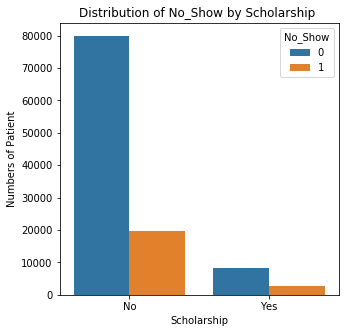

In [44]:
myPlot_Bivar(df,'Scholarship', 'No_Show')
plt.xticks([0,1],['No','Yes']);

* 0 means show up ,1 means no show

The number of patients without scholarship who attended the appointment is greater than those with scholarship.

The number of patients without scholarship who did not attend the appointment is greater than those with scholarship.

In [75]:
enrolled_welfare = df[df['Scholarship']== 1 ].No_Show.value_counts()
unenrolled_welfare =df[df['Scholarship']== 0 ].No_Show.value_counts()

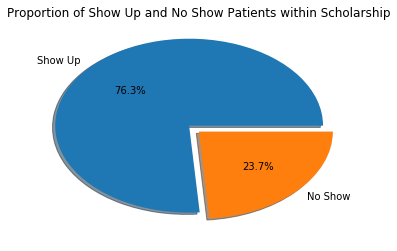

In [82]:
label = ['Show Up', 'No Show']
Plot_Pie_Bivar(enrolled_welfare, 'Scholarship');

The proportion of patients with scholarship that show up for the appointment is 76.3% and no show for the appointment is 23.7%.

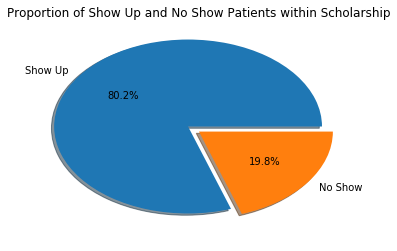

In [83]:
label = ['Show Up', 'No Show']
Plot_Pie_Bivar(unenrolled_welfare, 'Scholarship');

The proportion of patients without scholarship that show up for the appointment is 80.2% and no show for the appointment is 19.8%.

To conclude, patients without scholarship has a higher attendant rate than patients with scholarship.

### Research Question 6: Whether patients received SMS show up or no show for the appointment?

In [12]:
df.groupby('SMS_Received').No_Show.value_counts()

SMS_Received  No_Show
0             0          62509
              1          12535
1             0          25698
              1           9784
Name: No_Show, dtype: int64

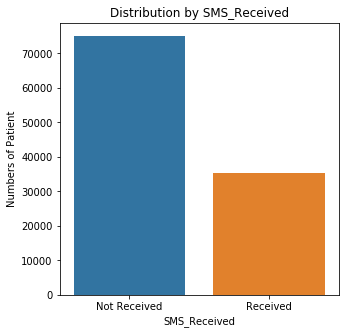

In [13]:
myPlot_Uni(df,'SMS_Received')
plt.xticks([0,1],['Not Received','Received']);

From the graph, most of the patients did not receive SMS reminder for their appointment.

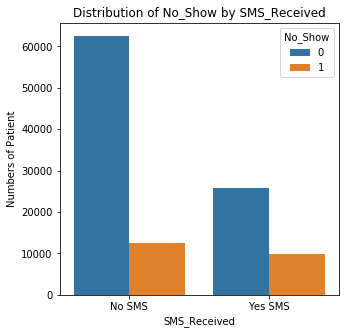

In [55]:
myPlot_Bivar(df, 'SMS_Received', 'No_Show')
plt.xticks([0,1],['No SMS','Yes SMS']);

* 0 means show up, 1 means no show

The number of patients not receiving SMS who attended appointment is greater than those receiving SMS.

The number of patients not receiving SMS who did not attended appointment is greater than those receiving SMS.


In [85]:
YesSMS = df[df['SMS_Received'] == 1].No_Show.value_counts()
NoSMS = df[df['SMS_Received'] == 0].No_Show.value_counts()

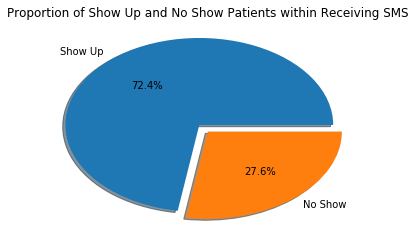

In [87]:
label = ['Show Up', 'No Show']
Plot_Pie_Bivar(YesSMS, 'Receiving SMS');

The proportion of patients receive SMS that show up for the appointment is 72.4% and no show for the appointment is 27.6%.

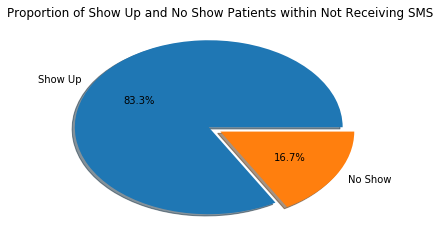

In [88]:
label = ['Show Up', 'No Show']
Plot_Pie_Bivar(NoSMS, 'Not Receiving SMS');

The proportion of patients did not receive SMS that show up for the appointment is 83.3% and no show for the appointment is 16.7%.

To conclude, patients did not receive SMS reminder has a higher attendante rate than those received SMS reminder.

### Research Question 7: What are the hospitals that patients attend and not attend for the appointment?

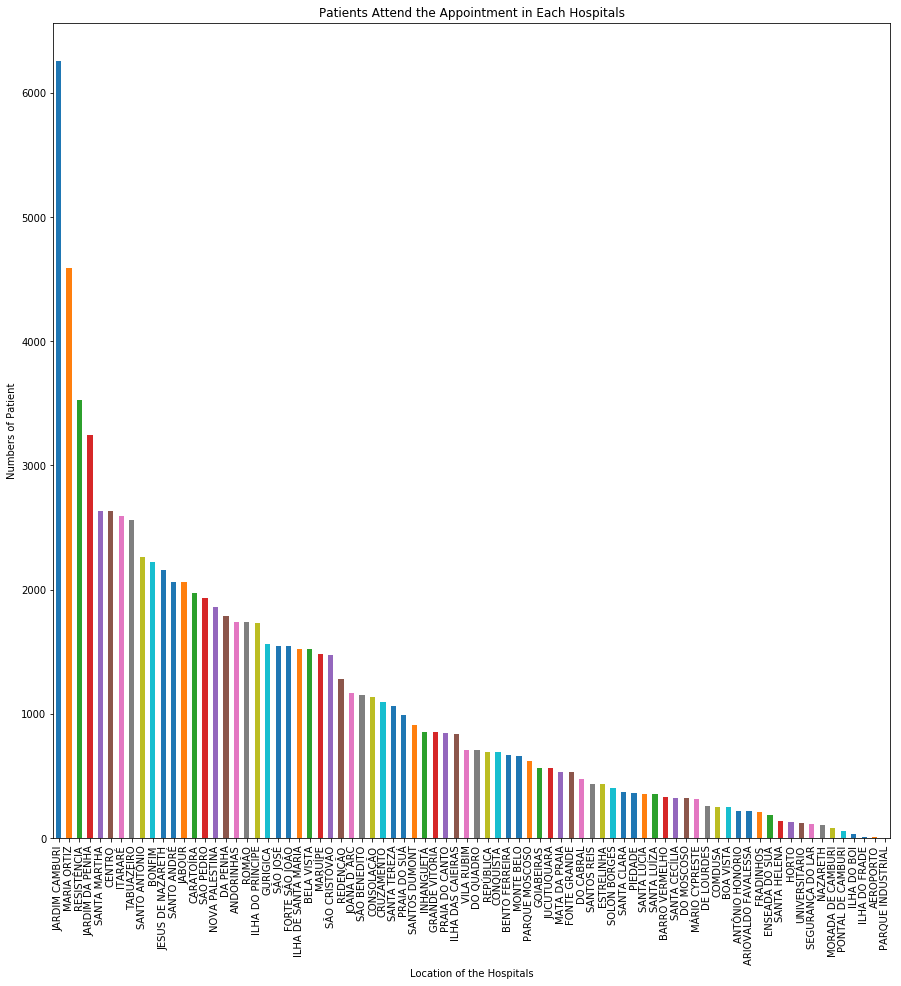

In [41]:
df.Neighbourhood[YesShow].value_counts().plot(kind='bar', figsize=(15,15))
plt.title('Patients Attend the Appointment in Each Hospitals')
plt.xlabel('Location of the Hospitals')
plt.ylabel('Numbers of Patient');

The top 5 hospitals that have the highest number for patients who attended the appointment are:

JARDIM CAMBURI, MARIA ORTIZ, RESISTENCIA, JARDIM DA PENHA, and SANTA MARTHA.

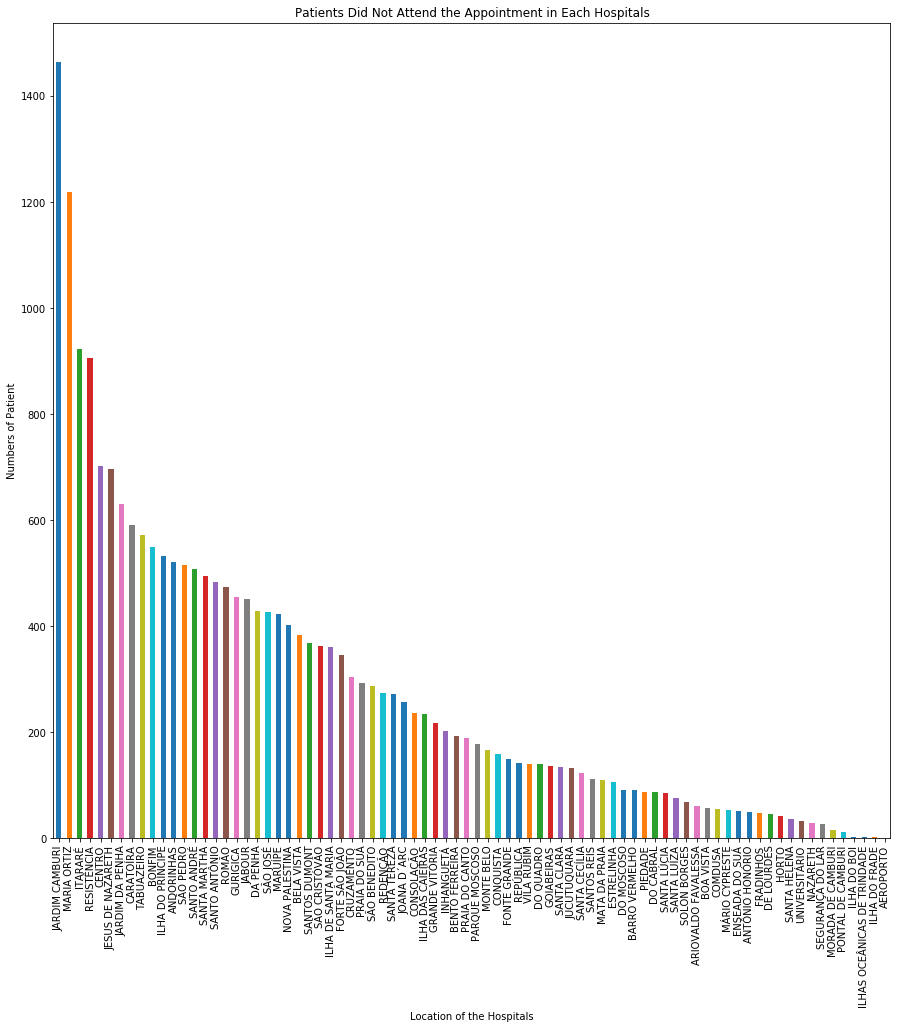

In [42]:
df.Neighbourhood[NoShow].value_counts().plot(kind='bar', figsize=(15,15))
plt.title('Patients Did Not Attend the Appointment in Each Hospitals')
plt.xlabel('Location of the Hospitals')
plt.ylabel('Numbers of Patient');

The top 5 hospitals that have the highest number for patients who didn't attend the appointment are:

JARDIM CAMBURI, MARIA ORTIZ, ITARARE, RESISTENCIA, and CENTRO.

<a id='conclusions'></a>
## Conclusions

## Univariate Exploration
### - What is the amount of patients for female and male?

As shown in the graph, the number of female patients(71839) are much more greater than of male patients(38687).

### - What is the proportion of appointment between show up and no shows?

The proportion for show up patients is 79.8% and no show patients is 20.2%. All most 80 percent of the patients attended their appointment.

## Bivariate Exploration

### - What is the age distribution between show up and no shows?

It can be seen from the graph that the range of the patient’s age is from 0 to 100 and most of the patients are under 70 years old.
Younger patients, (age 0-10) has more appointments than elderly patients(age 65 and above).

### - What are the amount of patients show up or no show within the gender?

The number of female who attended the appointment is greater than male. The number of female who didn't attend the appointment greater than male. 
However, if we transfer the numbers into proportion, female and male has almost the same attendant rate, which is 79.7% for female and 80% for male.

###  - Whether patients enrolled and non-enrolled in Brazilian welfare program show up or no show for the appointment?¶

It can be seen from the bar chart that most of the patients are not enrolled in the Brazilian welfare program. 
And those patients without the welfare has a higher attendant rate(80.2%) than those with the welfare(76.3%).

### - Whether patients received SMS show up or no show for the appointment?

Most of the patients did not received SMS reminder for their appointment. 
However, when we compare the attendant rate with those received and not received SMS reminder, we can see from the pie chart that patients who did not received SMS reminder actually has a higher attendant rate which is 83.3%, where the attendant rate for patients received SMS is 72.4%.

### - What are the hospitals that patients attend and not attend for the appointment?¶
The top three hospitals that have the highest attendance are Jardim Camburi, Maria Ortiz, and Resistancia.
The top three hospitals that have the highest no show attendance are Jardim Camburi, Maria Ortiz, and Itarare.



All factors are essential for us to predict patients attending their scheduled appointment. 

Firstly, gender is likely not significantly affect the patient’s attendance since the attendance rate is mostly the same. 

Secondly, when comparing 20-40 and 60-80 years old patients, older people have slightly lower no show than youngers. It may be because older people have more concerns and care about their health. 

Thirdly, most patients with scholarships in the Brazilian Welfare Program are most likely to miss their appointment, and those without scholarships are more likely to appear at the appointment. 

Finally, the most interesting part is on the attendance of patients whether receiving SMS reminders. Surprisingly, people who did not receive SMS have a more effective show-up rate than those who receive SMS. 


### Limitation

For the last conclusion we made, We are unable to know from the data what is causing the discrepancy. Since in reality, people who receive a reminder are more likely to attend their appointment. 

This discrepancy might be a human error, or the SMS sent timing is inappropriate. Such as the reminder was sent just after the booking or 5 minutes before their scheduled appointment. Both scenarios do not help remind patients of their appointment.

As a result, additional information such as collecting the data of the SMS sent timing can be helpful for this problem.

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0